# Credit Card Fraud Detection 
==========================================

    By : Aarav Chandra, Lohith Rajesh, Srivathsan Mohan, Supreeth Ramakrishna
***

***Importing the necessary packages and the dataset***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
complete_dataset=pd.read_csv('creditcard.csv')

***
#### Describing the data:
> - *info()*
> - *shape*
> - *head*
> - *describe*
> - *Checking for ***null*** values in the dataset.*
> - *Checking for any ***categorical*** data.*
***


In [3]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

*From above we can see that our dataset contains 28 attributes from V1 to V28 and their respective datatypes.*
***


In [1]:
complete_dataset.shape

NameError: name 'complete_dataset' is not defined

*Our dataset has 284807 rows and 31 columns.*
***

*Printing the top 10 rows of our dataset*

In [5]:
complete_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


*The above table shows us that 'Class' is the label of our dataset while rest are all attributes, it will represent if a transaction is fraudulent or not.*
   > - Fraudulent = 1
   > - Non-Fraudulent = 0
***

*Checking for 'null' values*

In [6]:
complete_dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*Above result shows that the columns do not have null values.* 
***

*Checking for any categorical data*

In [7]:
non_numerical=complete_dataset.select_dtypes(include=['object'])
non_numerical.columns

Index([], dtype='object')

*Above result shows that no categorical data is present.*
***


***Visualizing the distribution of our data***

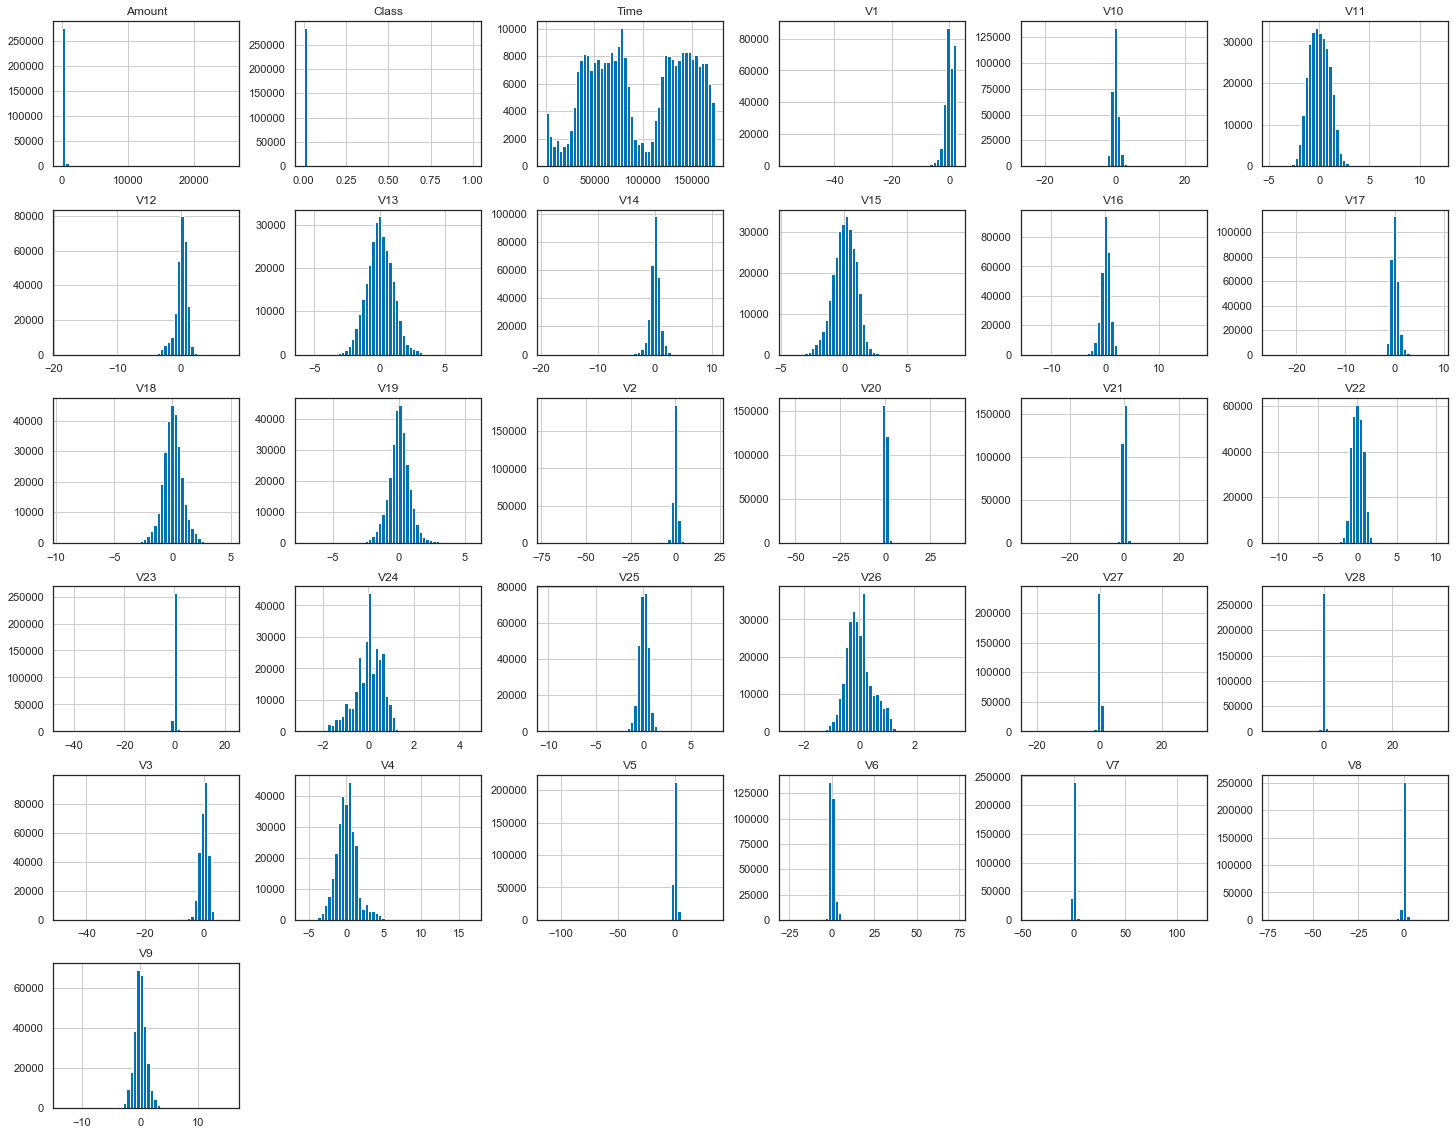

In [8]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=complete_dataset.hist(bins=50,figsize=(25,20))


*Based on the above histograms we have the following observations:*
> - *Amount data has either high values or low values.*
> - *Class data has large difference in its number of values of the different class types.*
> - *Time data has good distribution.*
> - *Atrributes like V9, V11, V13, V14, V15, V16, V18, V19, V22, V25 have close to normalized distribution while others have skewed distribution.*

*Visualizing **Amount** distribution as a Histogram Plot*

Text(0.5, 1.0, 'Histograms of Amount Variable')

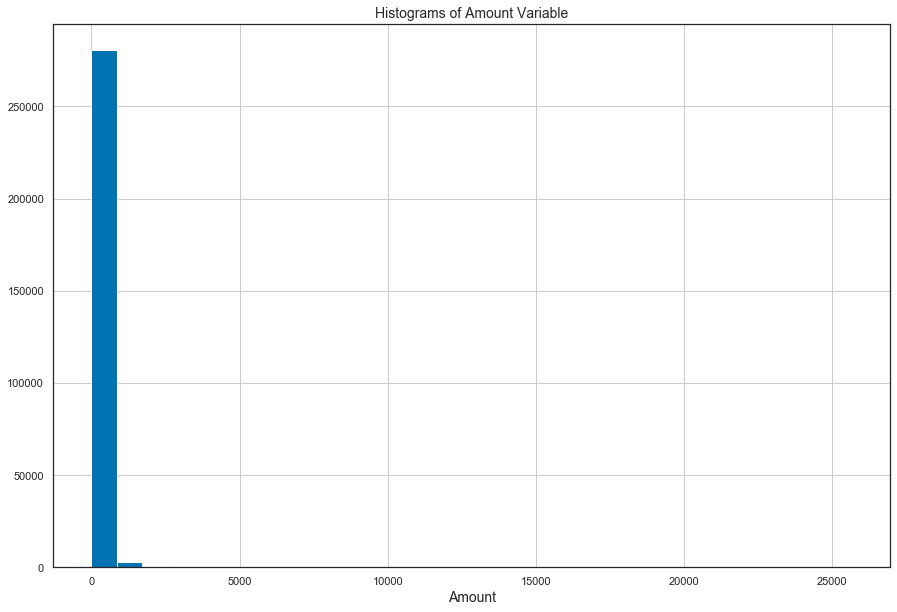

In [9]:
sns.set(color_codes=True, style="white", palette="colorblind")
axes=complete_dataset['Amount'].hist(bins=30,figsize=(15,10))
plt.xlabel('Amount',fontsize=14)
plt.title('Histograms of Amount Variable',fontsize=14)

*Visualizing **Amount** distribution as a 'distplot' (histogram with a kernel density estimate)*

Text(0.5, 1.0, 'Distribution of Amount Variable')

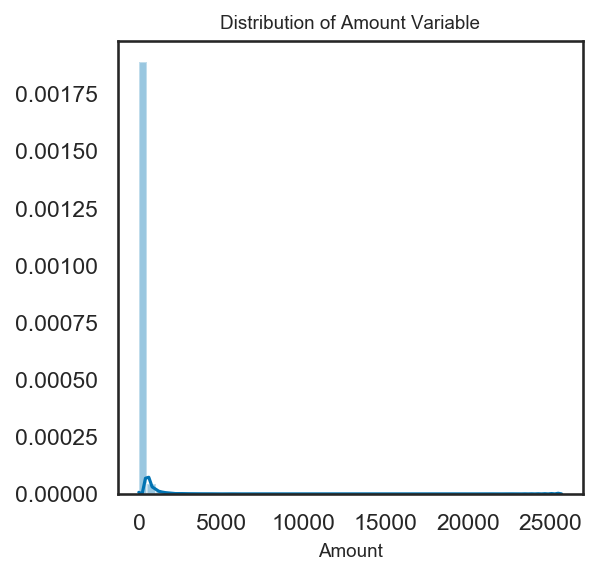

In [10]:
sns.set(color_codes=True, style="white", palette="colorblind")
graph=plt.figure(figsize=(4,4),dpi=150)
sns.distplot(complete_dataset['Amount'],kde=True)
plt.xlabel('Amount',fontsize=9)
plt.title('Distribution of Amount Variable',fontsize=9)

*Visualizing **Class** as countplot (counts of observations in each categorical bin using bars)*

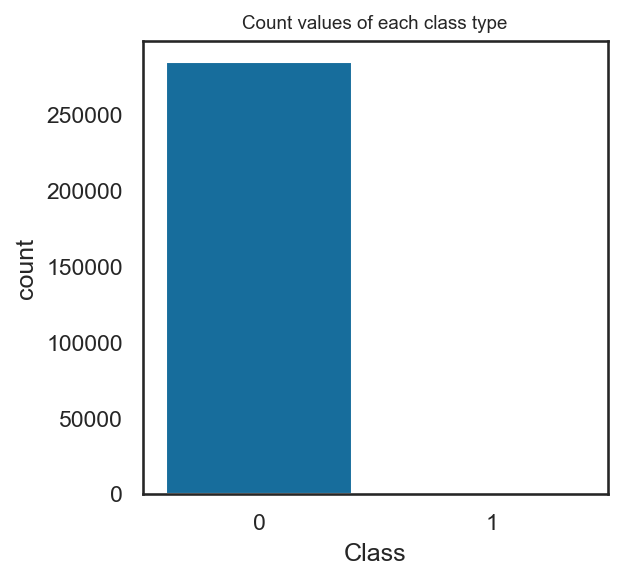

In [11]:
graph=plt.figure(figsize=(4,4),dpi=150)
plt.title('Count values of each class type',fontsize=9)
sns.countplot('Class',data=complete_dataset)

*Visualizing **Class** as scatterplot for visualizing its distribution with respect to time*

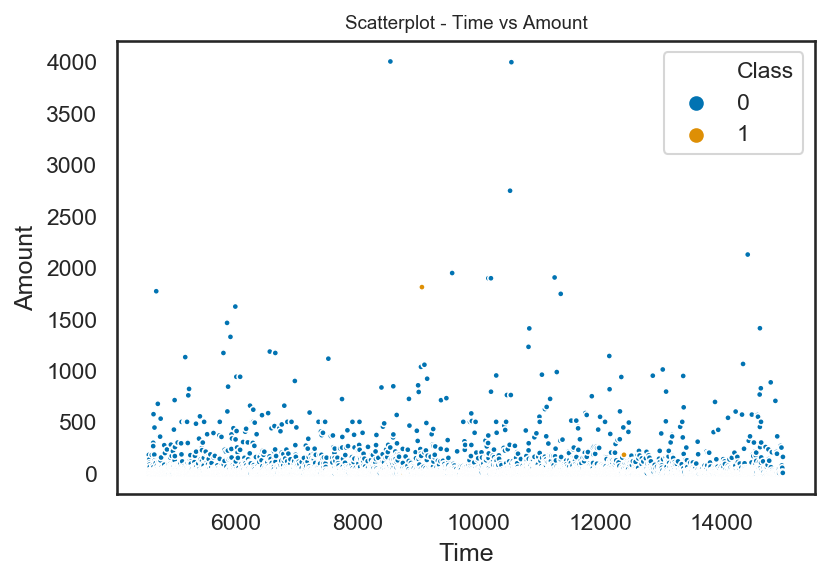

In [12]:
graph=plt.figure(dpi=150)
plt.title('Scatterplot - Time vs Amount',fontsize=9)
sns.scatterplot(x='Time',y='Amount',hue='Class',data=complete_dataset.iloc[5000:10000],marker='.')

> *Based on the above scatterplot we can observe that Class 0 data is way larger than Class 1 data.*
***

### Model Creations using Imbalanced Data


*Splitting the data into train-test split*

In [13]:
X1 = complete_dataset.drop(['Class'],axis=1).values
Y1 = complete_dataset['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.25,random_state=25)

***
> Logistic Regression

In [14]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[213214     32]
 [   173    186]]

Testing Confusion matrix:
 [[71064     5]
 [   59    74]]

Recall Score:		0.556390977443609
Precision Score:	0.9367088607594937
F1 Score:		0.6981132075471698
Accuracy:		0.9991011488441336


***
> Gaussian Naive Bayes

In [15]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[211804   1442]
 [   130    229]]

Testing Confusion matrix:
 [[70601   468]
 [   39    94]]

Recall Score:		0.706766917293233
Precision Score:	0.16725978647686832
F1 Score:		0.27050359712230215
Accuracy:		0.9928794134996208


***
>DecisionTree

In [16]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[213246      0]
 [     0    359]]

Testing Confusion matrix:
 [[71032    37]
 [   27   106]]

Recall Score:		0.7969924812030075
Precision Score:	0.7412587412587412
F1 Score:		0.7681159420289855
Accuracy:		0.9991011488441336


***
>K-Neighbors Neighbour

In [17]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[213246      0]
 [   330     29]]

Testing Confusion matrix:
 [[71068     1]
 [  123    10]]

Recall Score:		0.07518796992481203
Precision Score:	0.9090909090909091
F1 Score:		0.13888888888888887
Accuracy:		0.9982584758855089


***
>Random Forest

In [18]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[213246      0]
 [    22    337]]

Testing Confusion matrix:
 [[71058    11]
 [   22   111]]

Recall Score:		0.8345864661654135
Precision Score:	0.9098360655737705
F1 Score:		0.8705882352941177
Accuracy:		0.9995365298727564


***
>Support Vector Classification

In [19]:
model = SVC(kernel='rbf', C=1000000)
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[213212     34]
 [   168    191]]

Testing Confusion matrix:
 [[71061     8]
 [   55    78]]

Recall Score:		0.5864661654135338
Precision Score:	0.9069767441860465
F1 Score:		0.7123287671232876
Accuracy:		0.999115193393444


***

#### *Finding the total number of observations in each class labels*

In [20]:
counts = Counter(complete_dataset['Class'])
print(f"Number of class 0 : {counts[0]}\nNumber of class 1 : {counts[1]}\n")

Number of class 0 : 284315
Number of class 1 : 492



***
*As we can see that the above class has great **imbalance** between count of positive values and negative values.*<br>
*Inorder to get more accurate results, we need to address the imbalance of data.*<br>


<em>Two key techniques of sampling that can be used to address the imbalance of data are as follows:</em>
> - ***Under-Sampling :***<em> To delete examples from the majority class</em>
> - ***Over-Sampling :*** <em> To duplicate examples from the minority class</em>
***

### Applying Under - Sampling

- *Shuffling the dataset*

In [21]:
complete_dataset_shuffled=complete_dataset.sample(frac=1)
complete_dataset_shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
233998,147786.0,1.981772,-0.742076,-1.665055,-0.642407,1.671020,3.924440,-1.312120,1.060236,1.111274,...,0.156831,0.567256,0.207707,0.759495,-0.243153,0.589756,0.000845,-0.053961,5.69,0
199878,133175.0,-1.461708,-0.974991,-1.935809,-0.421247,2.921491,-2.178657,1.665359,-0.900704,-0.162878,...,-0.091231,1.075937,1.650084,0.631661,-1.130283,0.177386,0.317485,-0.146631,29.95,0
34528,37711.0,0.451611,-1.510566,1.283749,1.112657,-0.940773,2.534164,-1.151116,1.001149,1.578292,...,0.091467,0.274285,-0.057182,-0.774948,-0.120494,0.467313,0.059807,0.038747,234.82,0
161975,114709.0,1.924828,2.492785,-4.632175,4.680203,2.896928,-1.655817,1.320558,-0.408980,-1.976476,...,-0.345094,-0.950515,-0.070488,-0.023575,0.343826,0.045502,0.014314,0.122494,15.88,0
27029,34357.0,0.282139,1.771531,-2.208492,1.303896,1.382443,-1.431875,1.229741,-0.558912,0.824064,...,-0.425832,-0.464173,-0.018775,-0.855309,-0.288786,-0.385241,0.233592,-0.221084,17.99,0


- *Collecting all 'Class 1' i.e Fraudulent Transaction data*

In [22]:
fdata=complete_dataset_shuffled.loc[complete_dataset_shuffled['Class']==1]
print(f"Shape of this data is :\t{fdata.shape}\n")
fdata

Shape of this data is :	(492, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
10497,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79,1
10801,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00,1
157585,110087.0,1.934946,0.650678,-0.286957,3.987828,0.316052,-0.099449,-0.021483,-0.172327,0.508730,...,-0.173602,-0.190974,0.219976,-0.216597,-0.136692,-0.129954,-0.050077,-0.051082,1.00,1
52521,45501.0,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,...,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1
274475,166028.0,-0.956390,2.361594,-3.171195,1.970759,0.474761,-1.902598,-0.055178,0.277831,-1.745854,...,0.473211,0.719400,0.122458,-0.255650,-0.619259,-0.484280,0.683535,0.443299,39.90,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14104,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1
15166,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
123141,76826.0,-6.616293,3.563428,-7.058901,4.284346,-5.096299,-1.768618,-4.937554,2.748460,-3.796760,...,1.215976,0.041178,-1.059098,0.275662,0.057425,-0.265838,-0.514637,0.388590,254.76,1
27749,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1


- *Collecting same number of 'Class 0' i.e Non-Fraudulent Transaction data*

In [23]:
nfdata= complete_dataset_shuffled.loc[complete_dataset_shuffled['Class']==0].sample(n=492,random_state=42)
print(f"Shape of this data is :\t{nfdata.shape}\n")
nfdata


Shape of this data is :	(492, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
225410,144236.0,-1.016855,1.395365,-0.606025,-0.457053,0.162011,-1.296060,0.780907,-0.280619,0.653062,...,0.464775,1.243436,-0.005865,0.040425,-0.906037,-0.335284,-0.793976,0.126036,0.99,0
74959,55826.0,1.090583,0.025532,0.795732,1.332232,-0.487535,0.126780,-0.308650,0.270471,0.341534,...,-0.192599,-0.441049,0.101947,0.166817,0.318300,-0.524925,0.043802,0.013778,5.99,0
85315,60723.0,1.240521,0.337062,0.299476,0.699015,-0.369140,-1.067543,0.105886,-0.212873,0.013159,...,-0.281228,-0.824287,0.120689,0.349110,0.217161,0.093122,-0.023830,0.032514,9.99,0
86672,61347.0,-1.030210,0.540071,0.915351,1.599197,-0.986021,0.225911,1.097397,0.398103,-0.654129,...,0.220224,0.319655,0.519911,0.377886,-0.132549,-0.274160,-0.017737,0.106342,252.00,0
13191,23185.0,-0.687833,0.612403,1.429424,-2.464690,-0.426781,-1.237392,0.310511,-0.105043,2.299973,...,-0.113689,-0.102627,-0.079244,0.465201,-0.116210,-0.414760,-0.035706,0.088093,3.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232472,147184.0,-3.945013,-3.031196,1.059479,5.712764,3.300107,-1.848782,-1.949950,0.765191,-2.037439,...,0.754818,0.497348,-0.537690,0.050514,0.558068,0.777777,0.030208,-0.707253,10.62,0
62682,50376.0,0.058591,0.222235,0.266160,-1.840570,0.317849,-1.276537,0.856755,-0.489489,-1.085646,...,0.245703,0.881593,-0.114808,-0.103702,-0.607981,-0.419739,0.259916,0.049955,15.00,0
154514,101802.0,1.925277,0.659284,-1.779347,3.829571,1.386802,-0.095968,0.828548,-0.426743,-0.012162,...,-0.062445,0.006296,-0.191398,-1.058078,0.509778,0.189046,-0.119842,-0.072903,74.11,0
37162,38831.0,1.364839,-1.320403,0.758627,-1.516690,-1.528096,0.432493,-1.598672,0.358149,-1.667853,...,0.033137,0.478030,0.062095,-0.317586,0.118722,-0.057689,0.072528,0.007856,13.60,0


- *Performing the Under-Sampling*


In [24]:
rus = RandomUnderSampler()
undersampled_attributes,undersampled_labels = rus.fit_resample(complete_dataset_shuffled.drop(['Class'],axis=1), complete_dataset_shuffled['Class'])

In [25]:
undersampled_attributes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,111095.0,2.103077,-0.029392,-1.455872,0.336260,0.276746,-0.751520,-0.034006,-0.272978,2.280568,...,-0.355868,0.078436,0.550755,0.008453,0.395488,0.316608,-0.470412,-0.033189,-0.059343,1.00
1,73067.0,-1.029314,1.345937,0.907236,0.889277,0.420188,0.734501,0.476796,0.336575,0.086737,...,0.399825,-0.163325,0.205013,-0.275298,-0.664369,0.021205,-0.241934,0.189562,-0.205229,10.50
2,145964.0,-0.043502,-0.104005,0.263510,-3.398609,-0.214492,-1.328890,0.657691,-0.447766,0.003728,...,-0.347564,0.073740,1.030993,-0.425182,-0.031890,0.318390,-0.451821,0.224460,0.159494,22.76
3,162858.0,0.328165,-0.076672,0.086793,-1.726055,0.375415,0.575574,0.136829,0.096956,-1.185488,...,-0.380860,-0.294173,-0.352691,0.005501,-0.284159,-0.421333,0.491624,-0.003187,-0.009345,34.00
4,145650.0,-1.759887,0.190329,0.100150,1.222831,0.114402,0.366042,0.256747,0.212632,0.199529,...,-0.485970,0.298977,1.126218,-0.655490,0.577984,-0.224237,-0.348105,-0.247194,0.130753,127.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.185455,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12
980,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.577924,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99
981,76826.0,-6.616293,3.563428,-7.058901,4.284346,-5.096299,-1.768618,-4.937554,2.748460,-3.796760,...,-0.541634,1.215976,0.041178,-1.059098,0.275662,0.057425,-0.265838,-0.514637,0.388590,254.76
982,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.085760,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02


In [26]:
undersampled_labels

0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Class, Length: 984, dtype: int64

- *Joining the two results column-wise into a single dataframe*

In [27]:
undersampled=pd.concat([pd.DataFrame(undersampled_attributes),pd.DataFrame(undersampled_labels)],axis=1)
undersampled.columns=complete_dataset.columns
print(f"The shape of the undersampled data :\t{undersampled.shape}\n")
undersampled

The shape of the undersampled data :	(984, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,111095.0,2.103077,-0.029392,-1.455872,0.336260,0.276746,-0.751520,-0.034006,-0.272978,2.280568,...,0.078436,0.550755,0.008453,0.395488,0.316608,-0.470412,-0.033189,-0.059343,1.00,0
1,73067.0,-1.029314,1.345937,0.907236,0.889277,0.420188,0.734501,0.476796,0.336575,0.086737,...,-0.163325,0.205013,-0.275298,-0.664369,0.021205,-0.241934,0.189562,-0.205229,10.50,0
2,145964.0,-0.043502,-0.104005,0.263510,-3.398609,-0.214492,-1.328890,0.657691,-0.447766,0.003728,...,0.073740,1.030993,-0.425182,-0.031890,0.318390,-0.451821,0.224460,0.159494,22.76,0
3,162858.0,0.328165,-0.076672,0.086793,-1.726055,0.375415,0.575574,0.136829,0.096956,-1.185488,...,-0.294173,-0.352691,0.005501,-0.284159,-0.421333,0.491624,-0.003187,-0.009345,34.00,0
4,145650.0,-1.759887,0.190329,0.100150,1.222831,0.114402,0.366042,0.256747,0.212632,0.199529,...,0.298977,1.126218,-0.655490,0.577984,-0.224237,-0.348105,-0.247194,0.130753,127.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,25095.0,1.192396,1.338974,-0.678876,3.123672,0.643245,-1.184323,0.397586,-0.253499,0.411135,...,-0.377503,-0.889597,-0.074208,0.035446,0.550578,-0.027171,-0.024921,0.073605,3.12,1
980,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
981,76826.0,-6.616293,3.563428,-7.058901,4.284346,-5.096299,-1.768618,-4.937554,2.748460,-3.796760,...,1.215976,0.041178,-1.059098,0.275662,0.057425,-0.265838,-0.514637,0.388590,254.76,1
982,34687.0,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1


***
### Visualizing Data after Under - Sampling

- *countplot() to check the number of instances of both the classes*

Text(0.5, 1.0, 'Count Histogram of each label')

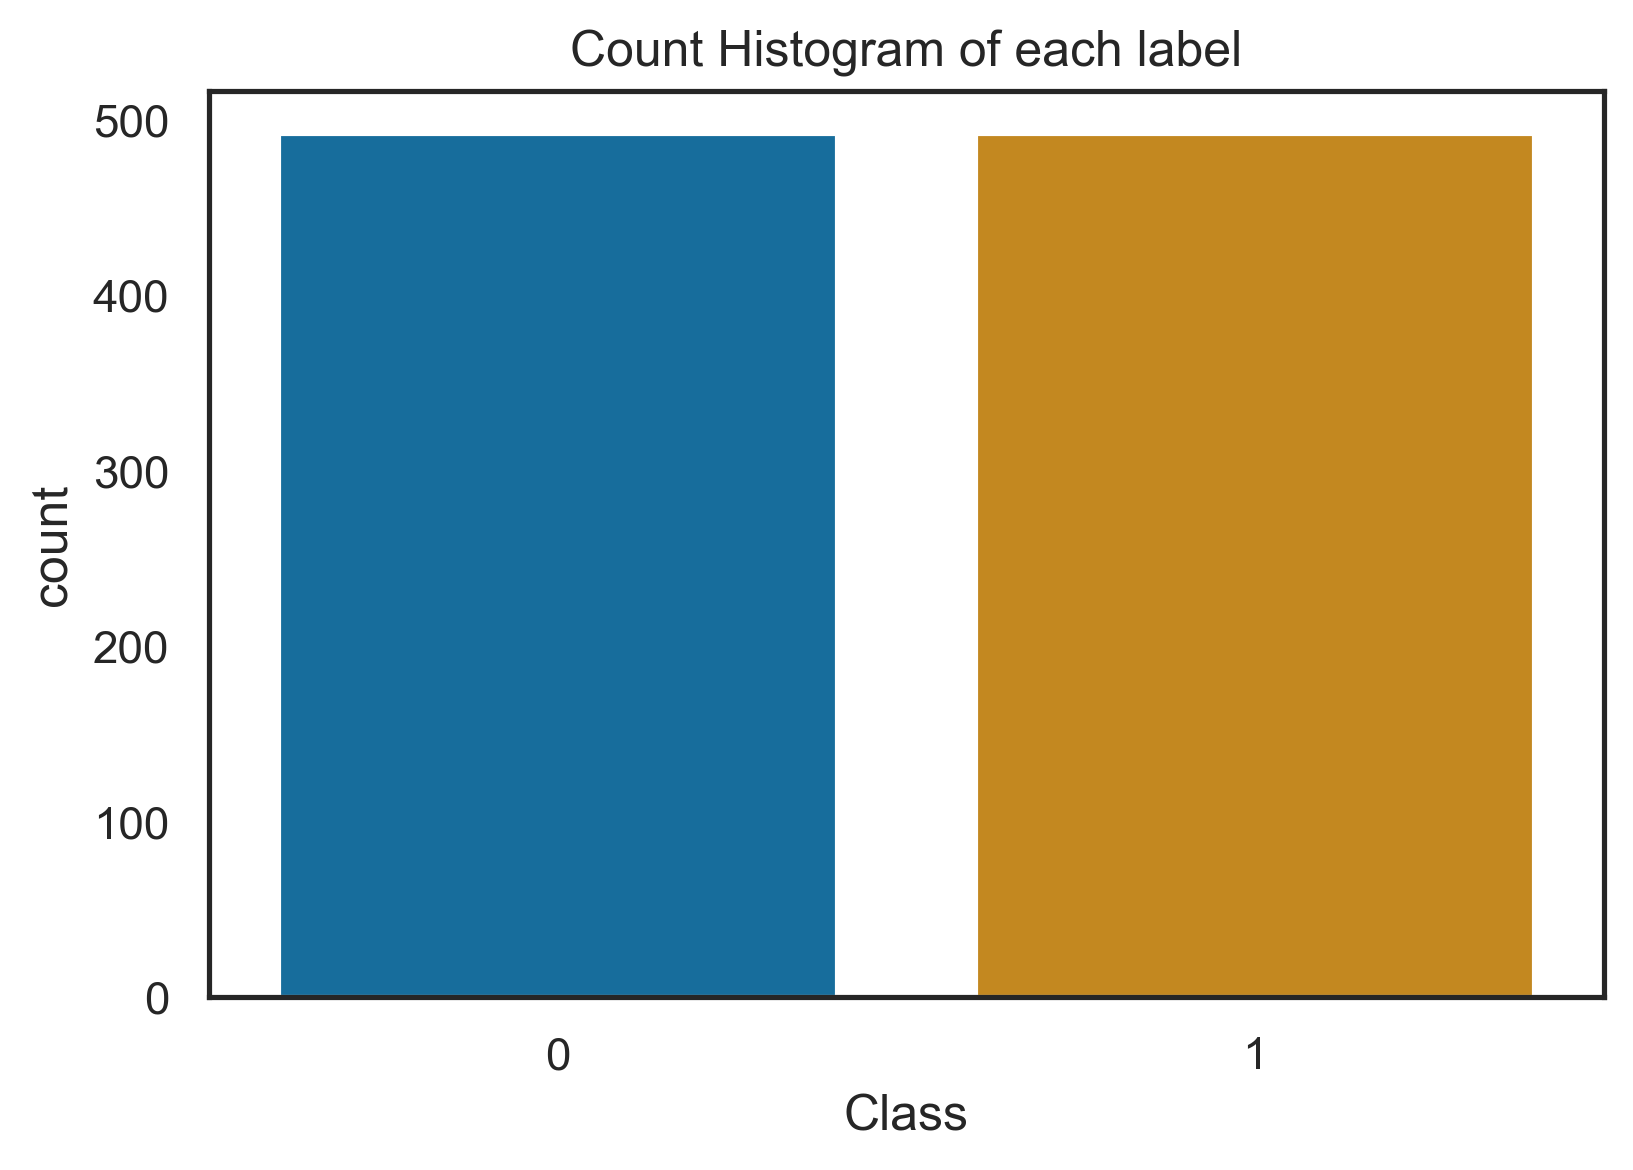

In [28]:
graph=plt.figure(dpi=300)
sns.countplot('Class',data=undersampled)
plt.title('Count Histogram of each label')

- *scatterplot() for visualizing amount distribution with respect to time*

Text(0.5, 1.0, 'Scatterplot (Under-Sampled) - Time vs Amount')

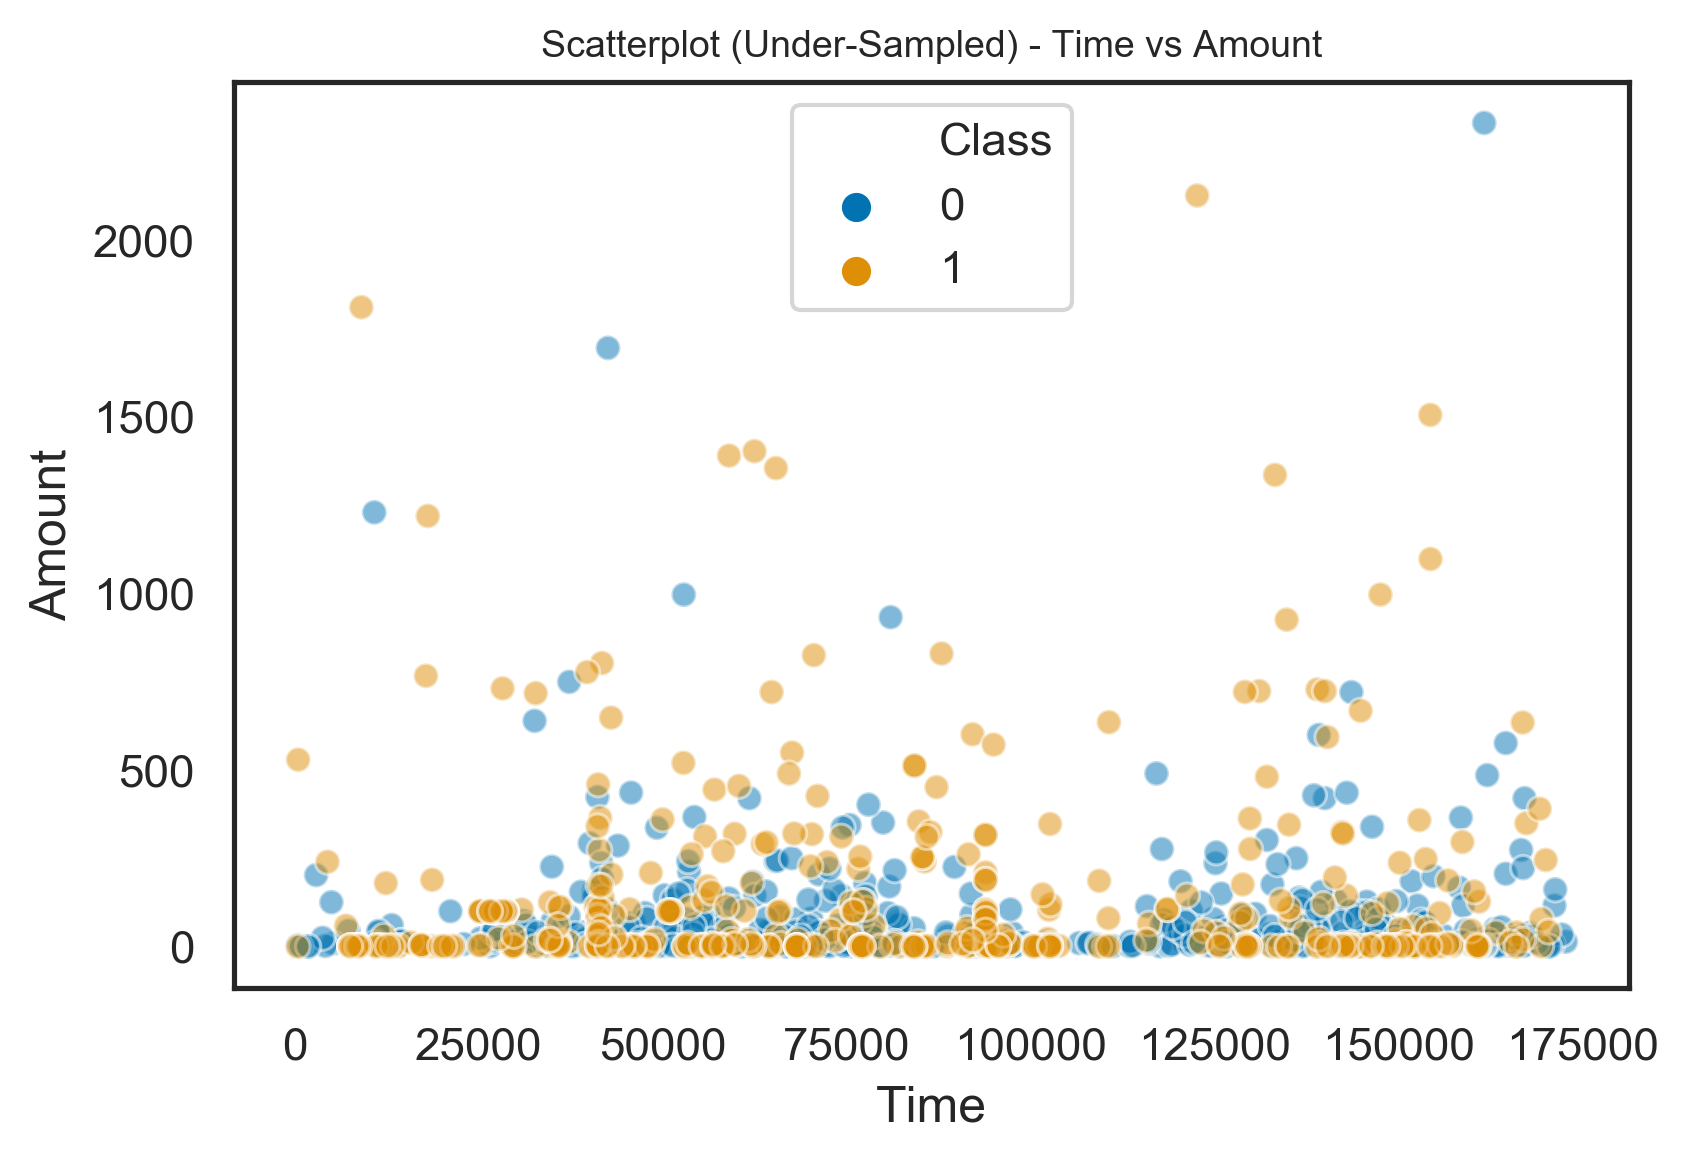

In [29]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='Time',y='Amount',hue='Class',data = undersampled,alpha=0.5)
plt.title('Scatterplot (Under-Sampled) - Time vs Amount',fontsize=9)

> <em>Under-Sampling Technique reduces the row to 984 rows i.e 492 rows of each <b>Class.</b></em><br>
***

### Model Creations using Under-Sampled Data

*Splitting the data into train-test split*

In [30]:
X2 = undersampled.drop(['Class'],axis=1).values
Y2 = undersampled['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X2,Y2,test_size=0.25,random_state=25)

***
>Logistic Regression

In [31]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[355  12]
 [ 47 324]]

Testing Confusion matrix:
 [[121   4]
 [ 13 108]]

Recall Score:		0.8925619834710744
Precision Score:	0.9642857142857143
F1 Score:		0.927038626609442
Accuracy:		0.9308943089430894


***
>Gaussian Naive Bayes

In [32]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[363   4]
 [ 99 272]]

Testing Confusion matrix:
 [[122   3]
 [ 30  91]]

Recall Score:		0.7520661157024794
Precision Score:	0.9680851063829787
F1 Score:		0.8465116279069769
Accuracy:		0.8658536585365854


***
>DecisionTree

In [33]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[367   0]
 [  0 371]]

Testing Confusion matrix:
 [[111  14]
 [ 12 109]]

Recall Score:		0.9008264462809917
Precision Score:	0.8861788617886179
F1 Score:		0.8934426229508197
Accuracy:		0.8943089430894309


***
>K-Neighbors Neighbour

In [34]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[281  86]
 [ 83 288]]

Testing Confusion matrix:
 [[76 49]
 [43 78]]

Recall Score:		0.6446280991735537
Precision Score:	0.6141732283464567
F1 Score:		0.6290322580645161
Accuracy:		0.6260162601626016


***
>Random Forest

In [35]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[367   0]
 [  5 366]]

Testing Confusion matrix:
 [[120   5]
 [ 16 105]]

Recall Score:		0.8677685950413223
Precision Score:	0.9545454545454546
F1 Score:		0.9090909090909091
Accuracy:		0.9146341463414634


***
>Support Vector Classification

In [36]:
model = SVC(kernel='rbf', C=1000000)
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[366   1]
 [ 68 303]]

Testing Confusion matrix:
 [[124   1]
 [ 22  99]]

Recall Score:		0.8181818181818182
Precision Score:	0.99
F1 Score:		0.8959276018099549
Accuracy:		0.9065040650406504


***
### Applying Over-Sampling using SMOTE

- *Performing the Over-Sampling*

In [37]:
sm= SMOTE()
oversampled_attributes,oversampled_labels=sm.fit_resample(complete_dataset.drop(['Class'],axis=1),complete_dataset['Class'])

In [38]:
oversampled_attributes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,103138.001571,-5.156370,4.101378,-6.074454,5.264897,-2.645682,-1.508234,-5.471961,2.284692,-2.170573,...,-0.301053,1.277504,0.294416,0.149726,-0.420477,-0.046548,0.298045,-0.463105,-0.137475,0.934709
568626,53390.973779,0.530952,1.089537,-1.610068,1.897324,-0.940175,-0.544033,-2.144115,0.507827,-1.013280,...,0.314900,0.481496,0.277359,-0.280133,-0.594675,0.813216,-0.200120,0.508780,0.245966,6.908323
568627,148340.208542,-1.773868,2.777945,-6.868730,4.082167,0.522768,-2.427950,-2.142688,1.263444,-2.752146,...,0.406055,0.863738,0.419419,0.033115,0.177880,-0.738952,-0.225144,0.520932,0.216811,80.638182
568628,86740.841700,-0.559629,0.017120,-0.583665,2.704856,-1.186539,1.016256,-0.200296,-2.971740,-0.234656,...,1.386779,-1.185945,1.037640,0.763691,0.590015,0.057321,-0.092444,0.184137,0.214579,380.086364


In [39]:
oversampled_labels

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64

- *Joining the two results column-wise into a single dataframe*

In [40]:
oversampled=pd.concat([pd.DataFrame(oversampled_attributes),pd.DataFrame(oversampled_labels)],axis=1)
oversampled.columns=complete_dataset.columns
oversampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,103138.001571,-5.156370,4.101378,-6.074454,5.264897,-2.645682,-1.508234,-5.471961,2.284692,-2.170573,...,1.277504,0.294416,0.149726,-0.420477,-0.046548,0.298045,-0.463105,-0.137475,0.934709,1
568626,53390.973779,0.530952,1.089537,-1.610068,1.897324,-0.940175,-0.544033,-2.144115,0.507827,-1.013280,...,0.481496,0.277359,-0.280133,-0.594675,0.813216,-0.200120,0.508780,0.245966,6.908323,1
568627,148340.208542,-1.773868,2.777945,-6.868730,4.082167,0.522768,-2.427950,-2.142688,1.263444,-2.752146,...,0.863738,0.419419,0.033115,0.177880,-0.738952,-0.225144,0.520932,0.216811,80.638182,1
568628,86740.841700,-0.559629,0.017120,-0.583665,2.704856,-1.186539,1.016256,-0.200296,-2.971740,-0.234656,...,-1.185945,1.037640,0.763691,0.590015,0.057321,-0.092444,0.184137,0.214579,380.086364,1


***
### Visualizing Data after Over-Sampling

- *countplot() to check the number of instances of both the classes*

Text(0.5, 1.0, 'Count Histogram of each label')

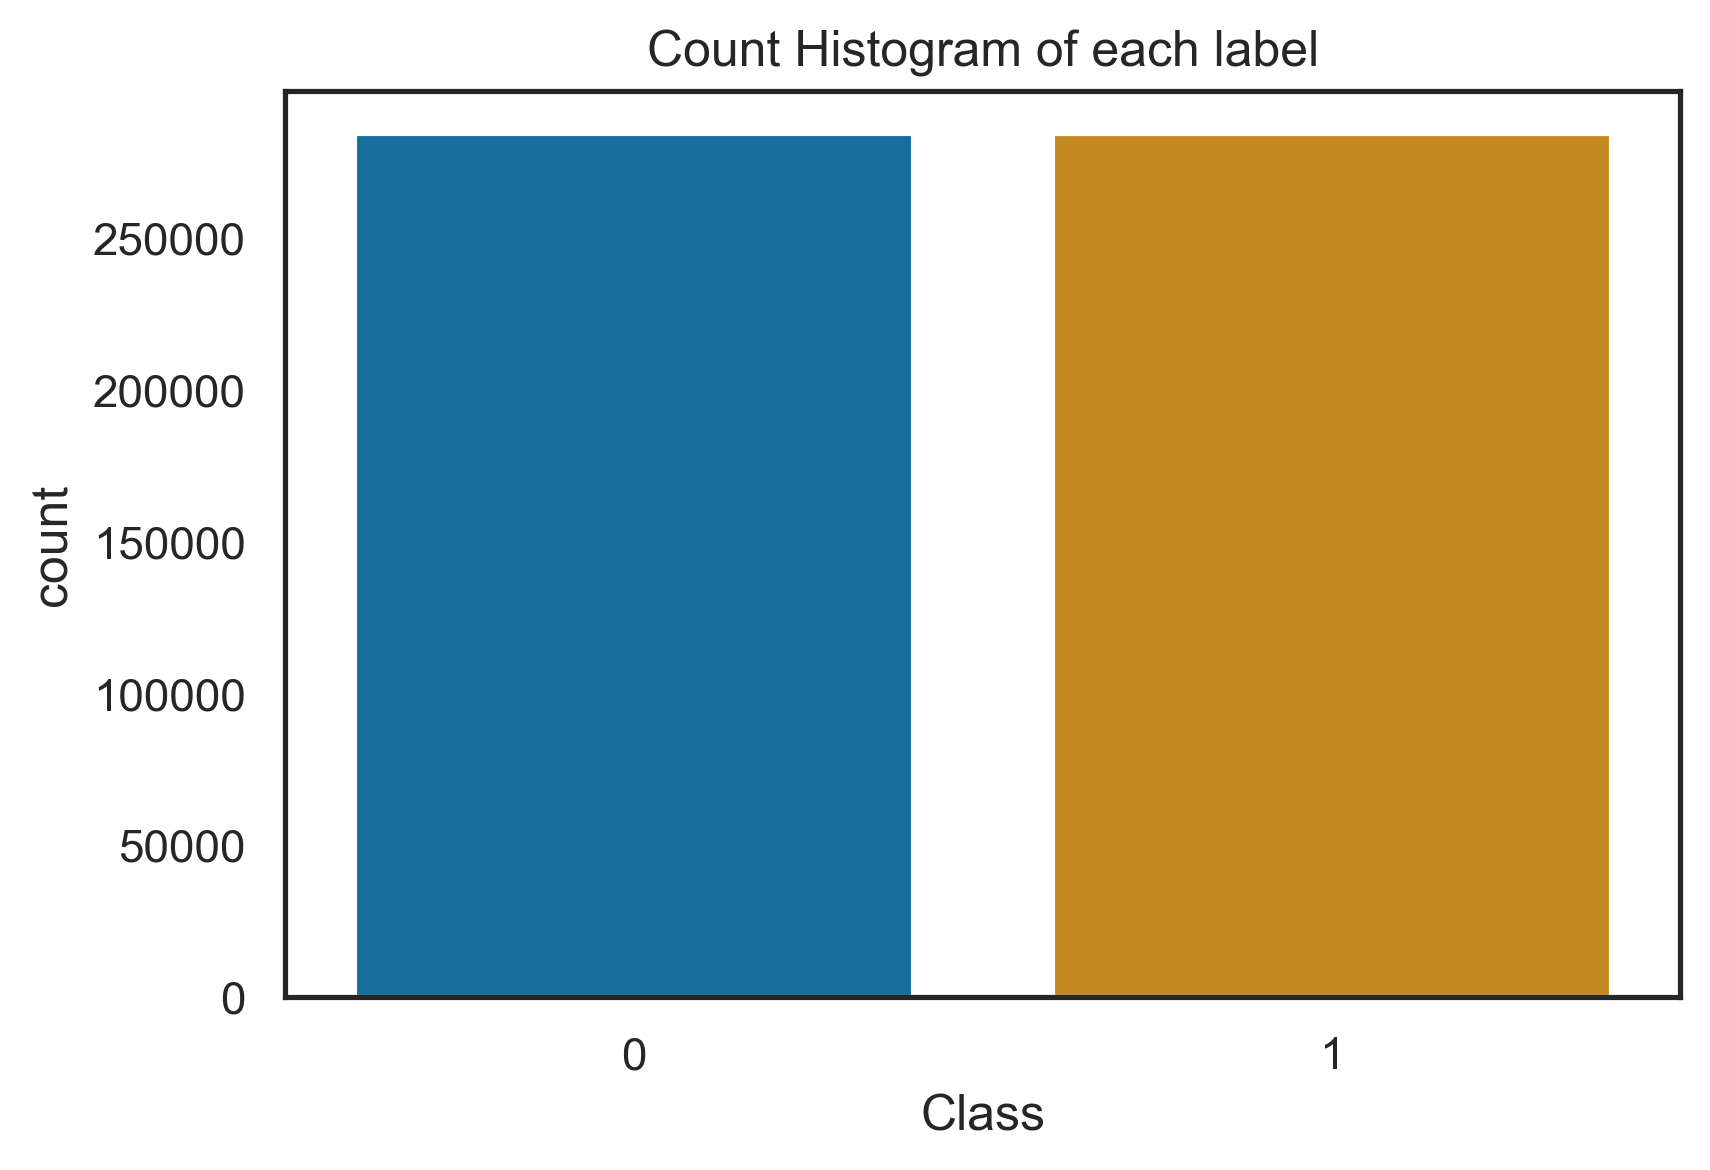

In [41]:
graph=plt.figure(dpi=300)
sns.countplot('Class',data=oversampled)
plt.title('Count Histogram of each label')

- *scatterplot() for visualizing amount distribution with respect to time*

Text(0.5, 1.0, 'Scatterplot (Over-Sampled) - Time vs Amount')

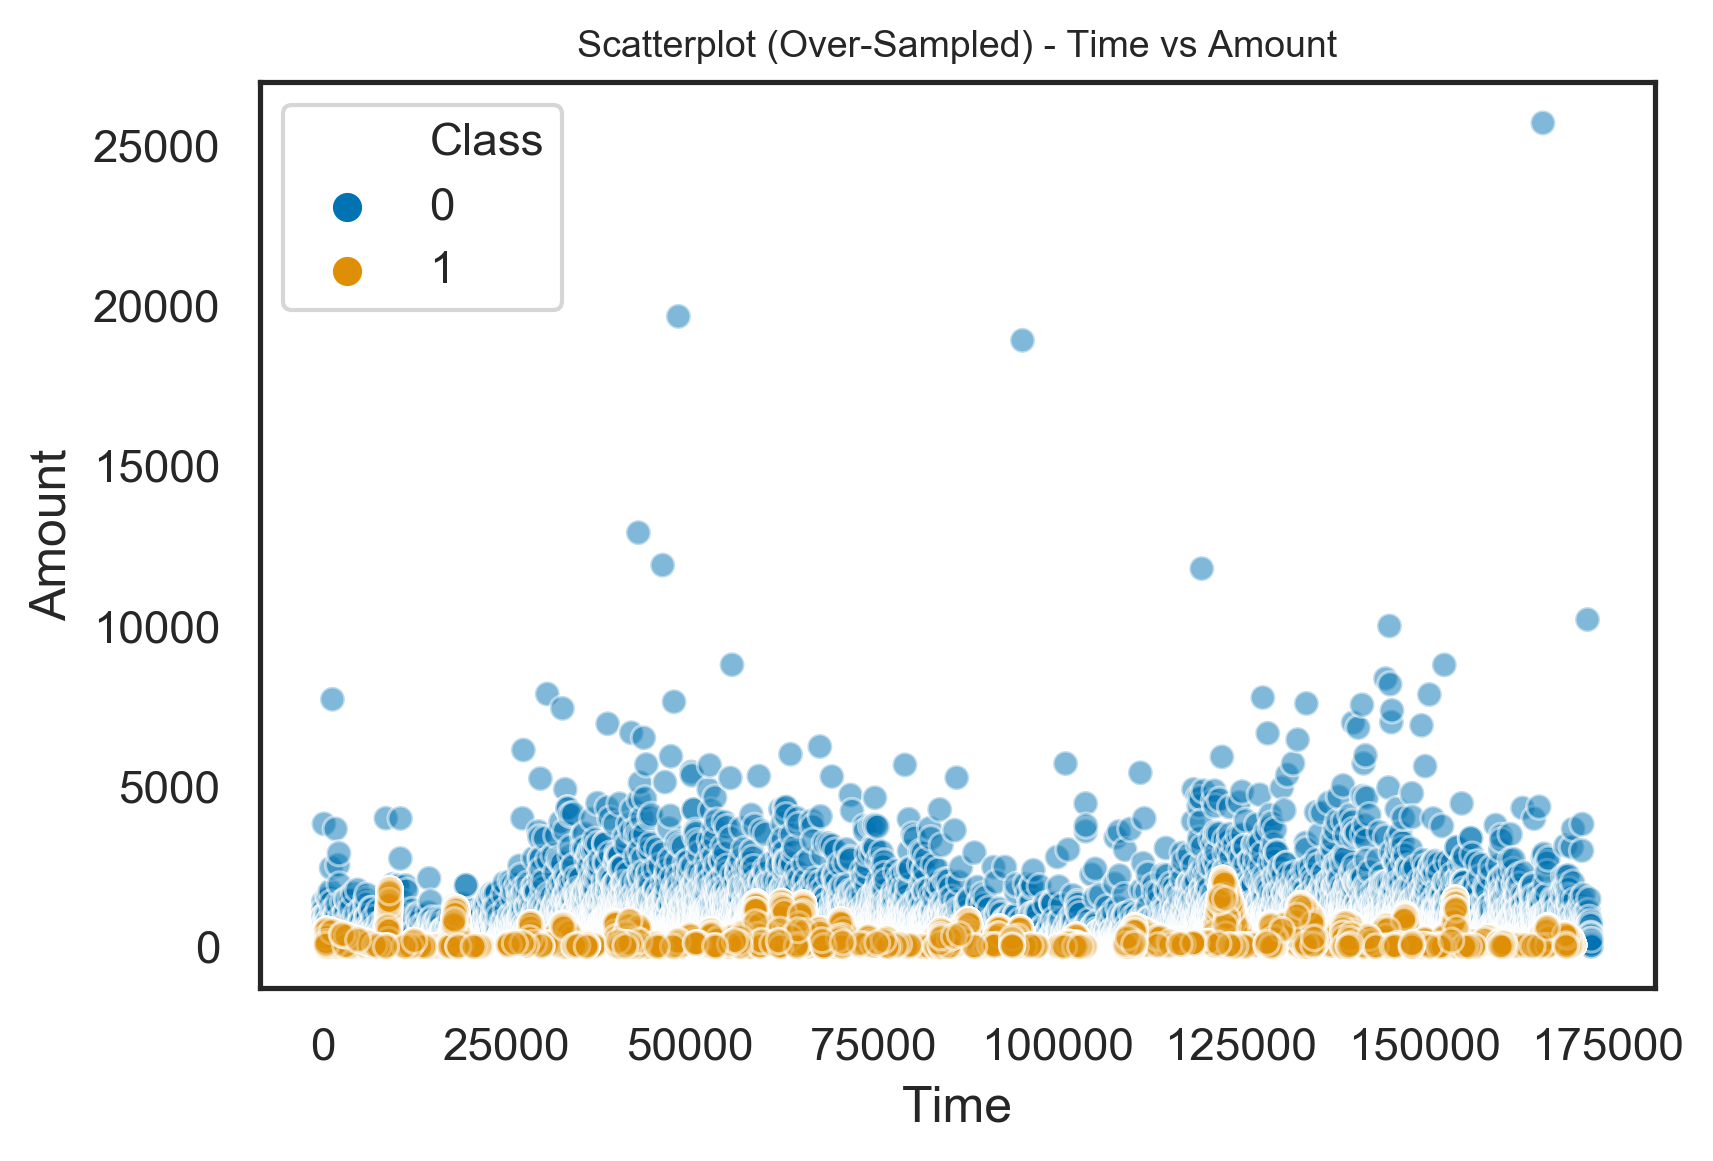

In [42]:
graph=plt.figure(dpi=300)
sns.scatterplot(x='Time',y='Amount',hue='Class',data = oversampled,alpha=0.5)
plt.title('Scatterplot (Over-Sampled) - Time vs Amount',fontsize=9)

> <em>Over-Sampling Technique increases the rows to 568630 rows i.e 284315 rows of each <b>Class.</b></em><br>

***
### Model Creations using Over-Sampled Data

*Splitting the data into train-test split*

In [43]:
X3 = oversampled.drop(['Class'],axis=1).values
Y3 = oversampled['Class'].values
x_train,x_test,y_train,y_test = train_test_split(X3,Y3,test_size=0.25,random_state=25)


***
>Logistic Regression

In [44]:
model = LogisticRegression(C = 0.01, penalty = 'l1', solver='liblinear')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[211000   1860]
 [  6826 206786]]

Testing Confusion matrix:
 [[70834   621]
 [ 2256 68447]]

Recall Score:		0.9680918772895069
Precision Score:	0.9910088608328025
F1 Score:		0.979416330998562
Accuracy:		0.9797619550078082


***
>Gaussian Naive Bayes

In [45]:
model = GaussianNB()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[211332   1528]
 [ 54710 158902]]

Testing Confusion matrix:
 [[70936   519]
 [17980 52723]]

Recall Score:		0.7456967879722218
Precision Score:	0.990252056647008
F1 Score:		0.8507483157852274
Accuracy:		0.86987014448712


***
>DecisionTree

In [46]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[212860      0]
 [     0 213612]]

Testing Confusion matrix:
 [[71259   196]
 [   57 70646]]

Recall Score:		0.9991938107293892
Precision Score:	0.9972332796928376
F1 Score:		0.9982125825709138
Accuracy:		0.9982202900997482


***
>K-Neighbors Neighbour

In [47]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[205032   7828]
 [  2660 210952]]

Testing Confusion matrix:
 [[67586  3869]
 [ 1630 69073]]

Recall Score:		0.9769458155948121
Precision Score:	0.9469578569274217
F1 Score:		0.9617181245431445
Accuracy:		0.9613176887688347


***
>Random Forest

In [48]:
model = RandomForestClassifier(n_estimators=10, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")

Training Confusion matrix:
 [[212858      2]
 [     0 213612]]

Testing Confusion matrix:
 [[71438    17]
 [    1 70702]]

Recall Score:		0.9999858563285857
Precision Score:	0.9997596119854636
F1 Score:		0.9998727213587703
Accuracy:		0.9998733803233022


***
>Support Vector Classification

In [ ]:
model = SVC(kernel='rbf', C=1000000)
model.fit(x_train, y_train)
predicted_y = model.predict(x_test)
training_prediction = model.predict(x_train)
print(f"Training Confusion matrix:\n {confusion_matrix(y_train,training_prediction)}\n")
print(f"Testing Confusion matrix:\n {confusion_matrix(y_test,predicted_y)}\n")
print(f"Recall Score:\t\t{recall_score(y_test,predicted_y)}\nPrecision Score:\t{precision_score(y_test,predicted_y)}\nF1 Score:\t\t{f1_score(y_test,predicted_y)}\nAccuracy:\t\t{accuracy_score(y_test,predicted_y)}")